<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialize" data-toc-modified-id="Initialize-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialize</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Part-I:-Ingredients" data-toc-modified-id="Part-I:-Ingredients-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Part I: Ingredients</a></span></li><li><span><a href="#Part-II:-Recipes" data-toc-modified-id="Part-II:-Recipes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Part II: Recipes</a></span></li></ul></li><li><span><a href="#What-can-I-make?" data-toc-modified-id="What-can-I-make?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>What can I make?</a></span></li><li><span><a href="#Optimize-home-bar" data-toc-modified-id="Optimize-home-bar-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Optimize home bar</a></span><ul class="toc-item"><li><span><a href="#Prepare-data-at-Category-2-level" data-toc-modified-id="Prepare-data-at-Category-2-level-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prepare data at Category 2 level</a></span></li><li><span><a href="#Prepare-data-at-Category-2-level" data-toc-modified-id="Prepare-data-at-Category-2-level-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Prepare data at Category 2 level</a></span></li></ul></li><li><span><a href="#Generate-Recipes" data-toc-modified-id="Generate-Recipes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generate Recipes</a></span><ul class="toc-item"><li><span><a href="#Prepare-data-for-analysis" data-toc-modified-id="Prepare-data-for-analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Prepare data for analysis</a></span></li><li><span><a href="#Ingredient-recommendations" data-toc-modified-id="Ingredient-recommendations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Ingredient recommendations</a></span></li><li><span><a href="#Recipe-recommendations" data-toc-modified-id="Recipe-recommendations-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Recipe recommendations</a></span></li><li><span><a href="#Evaluate-quality-of-predictions...WIP" data-toc-modified-id="Evaluate-quality-of-predictions...WIP-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Evaluate quality of predictions...WIP</a></span></li></ul></li></ul></div>

# Initialize

In [1]:
import sys
sys.executable

'C:\\Users\\Adrian\\Miniconda3\\envs\\cocktails\\python.exe'

In [2]:
# Load plugins
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
#from unidecode import unidecode
import seaborn as sns
#from fuzzywuzzy import fuzz
#from fuzzywuzzy import process
import json
#import plotly.offline as py
#py.init_notebook_mode(connected=False)

# Set plugin options
pd.set_option('display.max_rows', 999)
pd.set_option('display.min_rows', 999)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

# Set jupyter options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last_expr"

Populating the interactive namespace from numpy and matplotlib


## Import data

In [3]:
df = pd.read_csv('output/df-recipes-prepare_20191221.csv', encoding='utf-8-sig')
df.head(10)

,recipe_name,recipe_ingredient,recipe_method,ingredient_quantity,ingredient_name,ingredient_cat_1,ingredient_cat_2,ingredient_cat_3,bottle_match
0,20Th Century,1 1/2 Ounces Beefeater London Dry Gin,"Shake all the ingredients with ice, then doubl...",1 1/2 Ounces,Beefeater London Dry Gin,Spirits/Liqueurs,Gin,London,Beefeater London Dry Gin
1,20Th Century,3/4 Ounce Marie Brizard White Creme De Cacao,"Shake all the ingredients with ice, then doubl...",3/4 Ounce,Marie Brizard White Creme De Cacao,Spirits/Liqueurs,Liqueur,Fruit,Marie Brizard Creme de Cassis Liqueur
2,20Th Century,3/4 Ounce Cocchi Americano,"Shake all the ingredients with ice, then doubl...",3/4 Ounce,Cocchi Americano,Spirits/Liqueurs,Vermouth,Any,Cocchi Americano Rosa
3,20Th Century,3/4 Ounce Lemon Juice,"Shake all the ingredients with ice, then doubl...",3/4 Ounce,Lemon Juice,Juice,Lemon Juice,No match,No match
4,Airmail,1 Ounce Ron Del Barrilito 3-Star Rum,Shake all the ingredients (except the champagn...,1 Ounce,Ron Del Barrilito 3-Star Rum,Spirits/Liqueurs,Rum,Any,No match
5,Airmail,1/2 Ounce Lime Juice,Shake all the ingredients (except the champagn...,1/2 Ounce,Lime Juice,Juice,Lime Juice,No match,No match
6,Airmail,1/2 Ounce Acacia Honey Syrup,Shake all the ingredients (except the champagn...,1/2 Ounce,Acacia Honey Syrup,Syrups/Cordials,Honey Syrup,No match,No match
7,Airmail,Dry Champagne,Shake all the ingredients (except the champagn...,No match,Dry Champagne,Spirits/Liqueurs,Wine,Champagne,No match
8,Aviation,2 Ounces Plymouth Gin,"Shake all the ingredients with ice, then strai...",2 Ounces,Plymouth Gin,Spirits/Liqueurs,Gin,London,Plymouth Gin
9,Aviation,1/2 Ounce Luxardo Maraschino Liqueur,"Shake all the ingredients with ice, then strai...",1/2 Ounce,Luxardo Maraschino Liqueur,Spirits/Liqueurs,Liqueur,Fruit,Luxardo Maraschino Liqueur


# Analysis

<b><u>Part I: Ingredients</u></b> <BR>
In this section we aim to better understand the ingredients used in cocktail recipes. What are they? How often are they used? Precisely, we will answer:

1. How many ingredients are there?
1. How often is each ingredient used? What’s the distribution? Answer these questions based on the multiple levels of ingredient hierarchy available:
    1. Ingredient level (no categorization)
    1. Organized by category
    1. Organized by subcategory (where available)
    1. Organized by sub-subcategory (applicable to spirits only)
        1. Where not available, leverage an imprecise analytical answer (word cloud, etc.)
            
<b><u>Part II: Recipes</u></b> <br>
In this section we aim to better understand the recipes. How are ingredients combined to form recipes? Precisely, we will answer:

1. How many recipes are there?
1. How many ingredients do recipes use? What’s the distribution?
1. How many ingredients of each category (spirits/bitters/etc.) are used in recipes? What’s the distribution for each category?
1. What is the composition of a typical recipe? (category level)
1. How does the presence of certain ingredient category types influence the presence of other ingredient category types?
    1. Explore bivariate analysis (correlation, chi^2)
    1. Explore association rules

## Part I: Ingredients

Q1. How many ingredients are there?

In [4]:
df.shape[0]
df.drop_duplicates(['ingredient_name']).shape[0]

2763

514

- --> 2763 ingredients across recipes but only 514 unique ingredients. Perhaps every ingredient is used ~5 times (in 5 recipes), but it would be reasonable to assume that ingredient usage is not uniformly distributed - it's likely that some are used many times and many are used only once. Let's verify this by examining the distribution.

What are these ingredients?

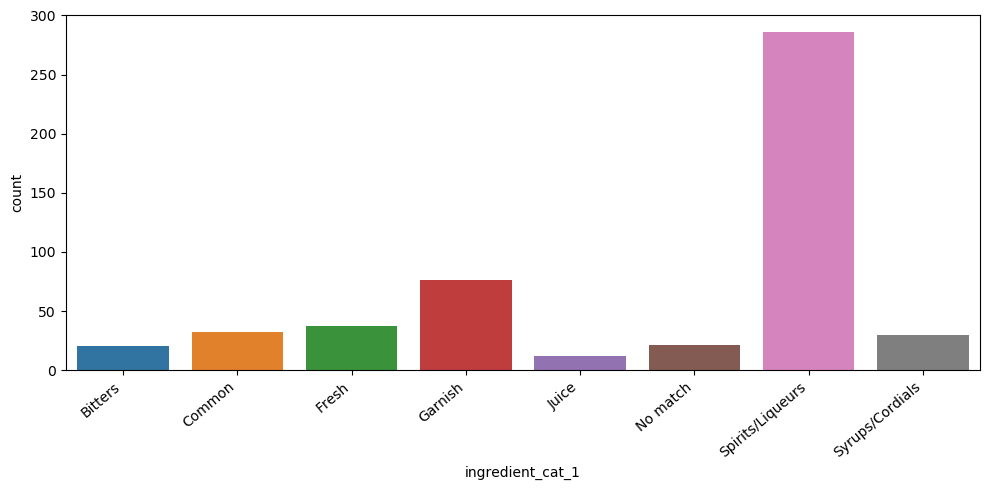

In [5]:
# Create data
pivot = df.drop_duplicates('ingredient_name').groupby(['ingredient_cat_1']).size().reset_index()
pivot.columns = ['ingredient_cat_1', 'count']

# Plot
fig = plt.figure(figsize=(10,5), dpi = 100)
ax = sns.barplot(data=pivot, x='ingredient_cat_1', y='count', ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
plt.tight_layout();
plt.show();

Q2. How often is each ingredient used? What’s the distribution?

Considering our ingredients have 4 layers of categorization, this problem can be sliced in many different ways.
- Uncategorized (ingredient name only)
- Cat 1 --> Spirits, Bitters, Syrups, etc
- Cat 2 --> One deeper layer of categorization (Lime juice, gin, etc.) NA to Garnishes
- Cat 3 --> Even one more layer. Only applicable to spirits (London gin, white rum, etc)

Examine distribution of ingredient usage in an uncategorized manner. This will give us an overall sense of ingredient versatility.

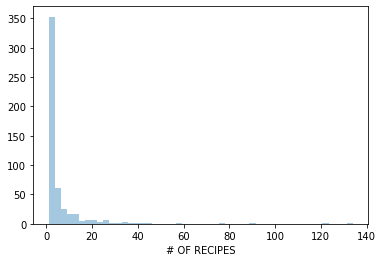

,INGREDIENT_NAME,# OF RECIPES
0,Lemon Juice,134
1,Lime Juice,123
2,Angostura Bitters,90
3,Simple Syrup,78
4,Cane Sugar Syrup,59
5,Lemon Twist,46
6,Club Soda,43
7,Orange Twist,40
8,Dry Champagne,40
9,House Peychauds Bitters,37


In [6]:
pivot = pd.DataFrame(df['ingredient_name'].value_counts()).reset_index()
pivot.columns = ['INGREDIENT_NAME', '# OF RECIPES']
sns.distplot(pivot['# OF RECIPES'], kde=False)
plt.show();
pivot.head(10)

- --> as we might have been able to guess, the distribution of ingredient usage is not uniformly distributed
- --> most ingredients are used only once, and very few are versatile - used across many recipes

Lets group these ingredients by their top most category, to see if this distribution (low versatility) is consistent across all categories or if there are any exceptions

Spirits/Liqueurs


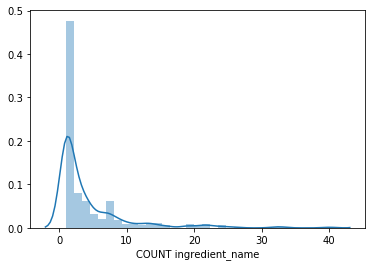

Juice


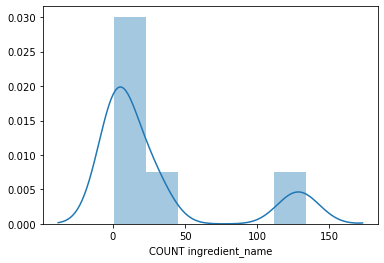

Syrups/Cordials


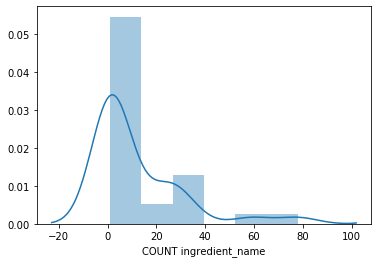

Garnish


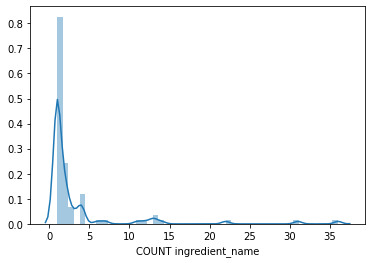

Bitters


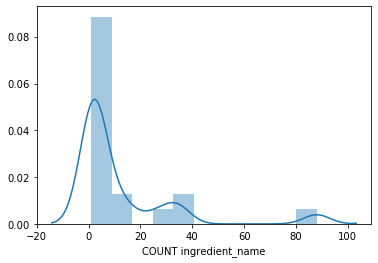

Fresh


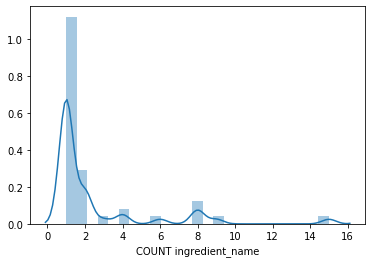

Common


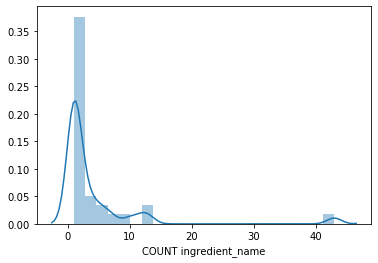

In [7]:
# Create data
pivot = df.groupby(['ingredient_cat_1', 'ingredient_name']).size().reset_index()
pivot.columns = ['ingredient_cat_1', 'ingredient_name', 'COUNT ingredient_name']
pivot = pivot.groupby(['ingredient_cat_1']).apply(lambda x: x.sort_values(by=["COUNT ingredient_name"], ascending = False)).reset_index(drop=True)

# Plot by category
for cat in df['ingredient_cat_1'].drop_duplicates().to_list():
    if cat != 'No match':
        criteria_1 = pivot['ingredient_cat_1'] == cat
        print(cat)
        sns.distplot(pivot.loc[criteria_1, 'COUNT ingredient_name'])
        plt.show();

- --> while the juice category might be an exception (bimodal), most subcategories follow the same distribution of ingredient usage. Unimodal and heavy right skew.
- --> We can conclude that most ingredients (even across categories) are not very versatile for cocktail making

View summary table of top 5 ingredients in each category (cat 1)

In [8]:
criteria_1 = df['ingredient_cat_1'] == "No match"

pivot = df[~criteria_1].groupby(['ingredient_cat_1', 'ingredient_name']).size().reset_index()
pivot.columns = ['ingredient_cat_1', 'ingredient_name', '# of recipes']
pivot = pivot.groupby('ingredient_cat_1')['ingredient_name', '# of recipes'].apply(lambda x: x.nlargest(5, '# of recipes'))
pivot

ingredient_name  # of recipes
ingredient_cat_1                                                    
Bitters          1                   Angostura Bitters            88
                 16            House Peychauds Bitters            35
                 15               House Orange Bitters            33
                 12   Bittermens Xocolatl Mole Bitters            26
                 5       Bitter Truth Aromatic Bitters            15
Common           24                          Club Soda            43
                 50                  White Sugar Cubes            13
                 30                        Heavy Cream            12
                 27                          Egg White            10
                 28                           Egg Yolk             7
Fresh            68                        Lemon Twist            15
                 90                         Strawberry             9
                 59                    Cucumber Wheels             8
                 74                        Mint Leaves             8
                 83                        Raspberries             8
Garnish          163                      Orange Twist            36
                 135                       Lemon Twist            31
                 141                        Lime Wedge            22
                 153                        Mint Sprig            14
                 142                        Lime Wheel            13
Juice            185                       Lemon Juice           134
                 186                        Lime Juice           123
                 184                  Grapefruit Juice            29
                 188                   Pineapple Juice            29
                 187                      Orange Juice            17
Spirits/Liqueurs 289                     Dry Champagne            40
                 246   Carpano Antica Formula Vermouth            33
                 466         Vieux Pontarlier Absinthe            32
                 364        Luxardo Maraschino Liqueur            26
                 220          Beefeater London Dry Gin            24
Syrups/Cordials  502                      Simple Syrup            78
                 483                  Cane Sugar Syrup            59
                 476                Acacia Honey Syrup            33
                 484               Cinnamon Bark Syrup            27
                 488                    Demerara Syrup            27

While interesting to see actual ingredient usages, it would be more useful to generalize each ingredient into a slightly larger category, to get a better sense of versatility (recipes that call for "Rye" rather than recipes that call for "Rittenhouse Rye"). Let's explore frequency of usage from cat 1 and cat 2, ignoring actual ingredients themselves.

In [9]:
criteria_1 = df['ingredient_cat_1'] == 'No match'

# Pivot to include top 5 only
pivot = df[~criteria_1].groupby(['ingredient_cat_1', 'ingredient_cat_2']).size().reset_index()
pivot.columns = ['ingredient_cat_1', 'ingredient_cat_2', 'COUNT ingredient_cat_2']
pivot = pivot.groupby('ingredient_cat_1')['ingredient_cat_2', 'COUNT ingredient_cat_2'].apply(lambda x: x.nlargest(5, 'COUNT ingredient_cat_2'))
pivot.reset_index(inplace=True)
pivot.drop('level_1', axis=1, inplace=True)
pivot

# Pivot to include all
pivot = df[~criteria_1].groupby(['ingredient_cat_1', 'ingredient_cat_2']).size().reset_index()
pivot.columns = ['ingredient_cat_1', 'ingredient_cat_2', 'COUNT ingredient_cat_2']
pivot = pivot.groupby(['ingredient_cat_1']).apply(lambda x: x.sort_values(by=['COUNT ingredient_cat_2'], ascending = False)).reset_index(drop=True)
#pivot

,ingredient_cat_1,ingredient_cat_2,COUNT ingredient_cat_2
0,Bitters,Angostura,88
1,Bitters,Orange,34
2,Bitters,Mole,26
3,Bitters,Aromatic,15
4,Bitters,Whiskey,12
5,Common,Club Soda,45
6,Common,Sugar,21
7,Common,Egg,19
8,Common,Salt,14
9,Common,Heavy Cream,13


- --> Bitters. This makes sense and seems to cover all the bases of bitter profiles at a high level. Aromatic, citrus, and deeper flavors
- --> Common. Interesting. Always have club soda, eggs, and heavy cream around.
- --> Fresh. Citrus and mint.
- --> Juice. Lemon and Lime reign.
- --> Spirits. See deep dive below
- --> Syrups. Wasn't sure what to expect other than simple syrup but very interesting to see the top syrups to have on hand.

Lets focus on the spirits section a little more closely

In [10]:
# Create pivot data
criteria_1 = df['ingredient_cat_1'] == 'Spirits/Liqueurs'
pivot = df[criteria_1].groupby(['ingredient_cat_1', 'ingredient_cat_2']).size().reset_index()
pivot.columns = ['ingredient_cat_1', 'ingredient_cat_2', 'COUNT ingredient_cat_2']
pivot = pivot.groupby(['ingredient_cat_1']).apply(lambda x: x.sort_values(by=['COUNT ingredient_cat_2'], ascending = False)).reset_index(drop=True)
pivot

,ingredient_cat_1,ingredient_cat_2,COUNT ingredient_cat_2
0,Spirits/Liqueurs,Liqueur,263
1,Spirits/Liqueurs,Vermouth,204
2,Spirits/Liqueurs,Rum,154
3,Spirits/Liqueurs,Gin,127
4,Spirits/Liqueurs,Whiskey,121
5,Spirits/Liqueurs,Brandy,100
6,Spirits/Liqueurs,Tequila,75
7,Spirits/Liqueurs,Fortified Wine,48
8,Spirits/Liqueurs,Wine,44
9,Spirits/Liqueurs,Absinthe,35


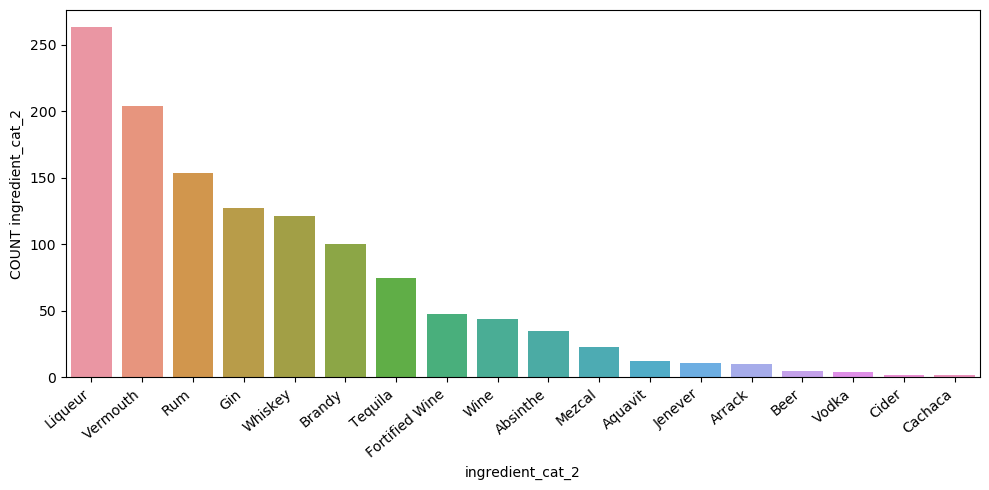

In [11]:
# Plot
fig = plt.figure(figsize=(10,5), dpi = 100)
ax = sns.barplot(data=pivot, x='ingredient_cat_2', y='COUNT ingredient_cat_2', ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
plt.tight_layout();
plt.show();

- --> Spirits. This is interesting. Modifier ingredients such as liqueurs and vermouths are used much more than the "base spirits". This makes sense, as base spirits in cocktails change, the modifiers do not. Without diving deeper we can see it is critical to have modifiers on hand to make craft cocktails. An analysis of category 3 will further be required here.

Knowing that Rum and Gin are more popular than Tequila and Absinthe is useful, but lets utilize the deeper level of categorization available for spirits to examine further details about this breakdown

In [12]:
# Set criteria
criteria_1 = df['ingredient_cat_1'] == 'Spirits/Liqueurs'

# Create pivot
pivot = df[criteria_1].groupby(['ingredient_cat_2', 'ingredient_cat_3']).size().reset_index()
pivot.columns = ['ingredient_cat_2', 'ingredient_cat_3', 'COUNT']
pivot.sort_values(by=['COUNT'], ascending = False, inplace=True)
pivot.reset_index(inplace=True, drop=True)
pivot.head(20)

,ingredient_cat_2,ingredient_cat_3,COUNT
0,Vermouth,Any,204
1,Liqueur,Fruit,118
2,Liqueur,Herb,102
3,Gin,London,92
4,Rum,Golden,80
5,Whiskey,Rye,42
6,Wine,Champagne,40
7,Rum,Any,38
8,Tequila,Blanco,37
9,Brandy,Calvados,37


- --> These are the top spirits you should be buying to make craft cocktails

The categories are useful, but lets jump back into specific ingredients (bottle) for now to provide recommendations on actually what to buy (cat 2 level)

In [13]:
# Top 3
criteria_1 = df['ingredient_cat_1'] == "Spirits/Liqueurs"

pivot = df[criteria_1].groupby(['ingredient_cat_2', 'ingredient_name']).size().reset_index()
pivot.columns = ['ingredient_cat_2', 'ingredient_name', '# of recipes']
pivot = pivot.groupby('ingredient_cat_2')['ingredient_name', '# of recipes'].apply(lambda x: x.nlargest(3, '# of recipes'))
pivot.reset_index(inplace=True)
pivot.drop('level_1', axis=1, inplace=True)
pivot

# All
criteria_1 = df['ingredient_cat_1'] == 'Spirits/Liqueurs'

pivot = df[criteria_1].groupby(['ingredient_cat_2', 'ingredient_name']).size().reset_index()
pivot.columns = ['ingredient_cat_2',  'ingredient_name', 'COUNT ingredient_name']
pivot = pivot.groupby(['ingredient_cat_2']).apply(lambda x: x.sort_values(by=["COUNT ingredient_name"], ascending = False)).reset_index(drop=True)
# pivot

,ingredient_cat_2,ingredient_name,# of recipes
0,Absinthe,Vieux Pontarlier Absinthe,32
1,Absinthe,St. George Absinthe,3
2,Aquavit,Krogstad Aquavit,7
3,Aquavit,Linie Aquavit,5
4,Arrack,Van Oosten Batavia Arrack,10
5,Beer,Blanche De Bruxelles Beer,1
6,Beer,Full Sail Session Black Lager,1
7,Beer,Green Flash Ipa,1
8,Brandy,Lairds Bonded Apple Brandy,24
9,Brandy,Hine H Cognac,15


Bottle reccommendations, cat 3 level

In [14]:
# Top 3
criteria_1 = df['ingredient_cat_1'] == "Spirits/Liqueurs"

pivot = df[criteria_1].groupby(['ingredient_cat_2','ingredient_cat_3', 'ingredient_name']).size().reset_index()
pivot.columns = ['ingredient_cat_2', 'ingredient_cat_3', 'ingredient_name', '# of recipes']
pivot = pivot.groupby(['ingredient_cat_2', 'ingredient_cat_3'])['ingredient_name', '# of recipes'].apply(lambda x: x.nlargest(3, '# of recipes'))
pivot.reset_index(inplace=True)
pivot.drop('level_2', axis=1, inplace=True)
pivot

# All
criteria_1 = df['ingredient_cat_1'] == "Spirits/Liqueurs"

pivot = df[criteria_1].groupby(['ingredient_cat_2','ingredient_cat_3', 'ingredient_name']).size().reset_index()
pivot.columns = ['ingredient_cat_2', 'ingredient_cat_3', 'ingredient_name', '# of recipes']
pivot = pivot.groupby(['ingredient_cat_2', 'ingredient_cat_3']).apply(lambda x: x.sort_values(by=["# of recipes"], ascending = False)).reset_index(drop=True)
# pivot

,ingredient_cat_2,ingredient_cat_3,ingredient_name,# of recipes
0,Absinthe,Any,Vieux Pontarlier Absinthe,32
1,Absinthe,Any,St. George Absinthe,3
2,Aquavit,Any,Krogstad Aquavit,7
3,Aquavit,Any,Linie Aquavit,5
4,Arrack,Any,Van Oosten Batavia Arrack,10
5,Beer,Any,Blanche De Bruxelles Beer,1
6,Beer,Any,Negra Modelo Beer,1
7,Beer,IPA,Green Flash Ipa,1
8,Beer,Lager,Full Sail Session Black Lager,1
9,Beer,Stout,Mackeson Stout,1


Examine word clouds for ingredients across categories

['Juice', 'Syrups/Cordials', 'Garnish', 'Bitters', 'Fresh', 'Common']

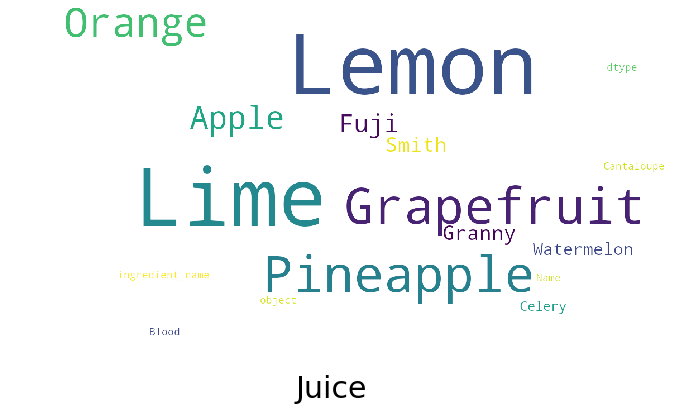

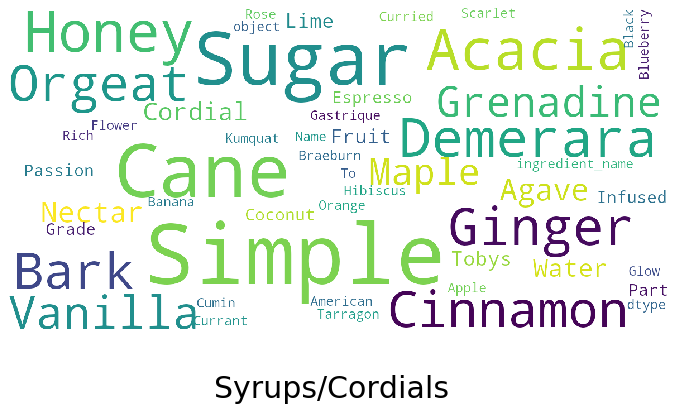

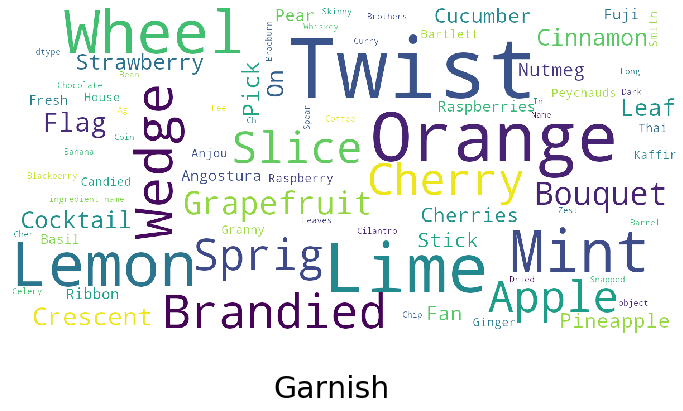

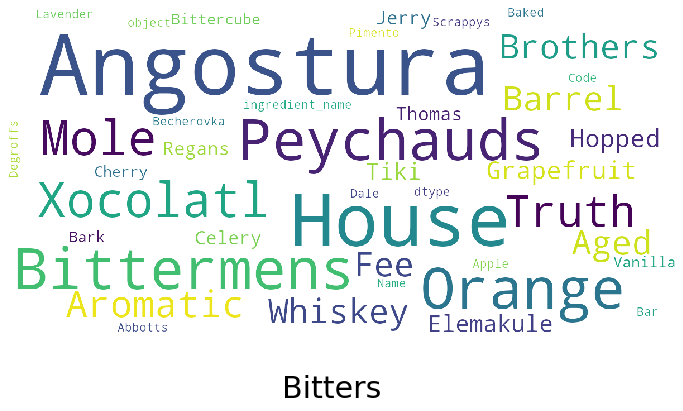

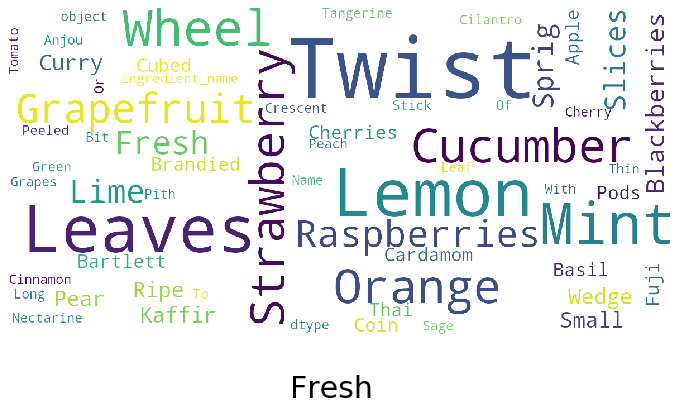

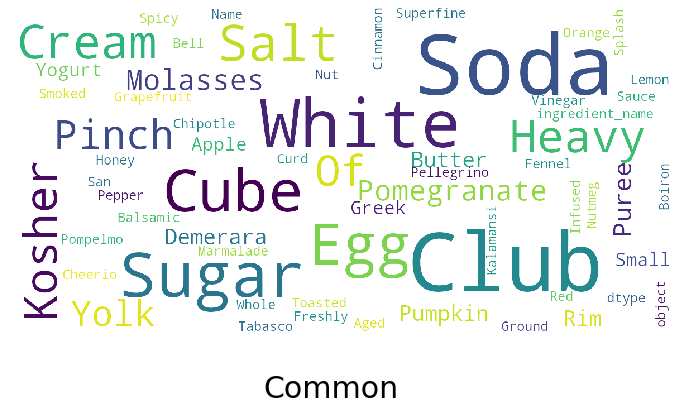

[None, None, None, None, None, None]

In [15]:
# Import
from wordcloud import WordCloud
# Define stopwords
stopwords = ['bitter','bitters', 'and', "juice", "syrup"]
# Define function
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        #background_color='white',
        background_color="rgba(255, 255, 255, 0)", 
        mode="RGBA",
        stopwords=stopwords,
        max_words=200,
        max_font_size=50, 
        scale=3,
        random_state=1,
        collocations=False
    ).generate(str(data))
    # Plot
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=30)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# Create filter
criteria_1 = df['ingredient_cat_1'] == 'Bitters'

# Create data
criteria_1 = [x for x in df['ingredient_cat_1'].drop_duplicates() if x not in ['Spirits/Liqueurs', 'No match']]
criteria_1

# Apply wordcloud
[show_wordcloud(df.loc[df['ingredient_cat_1'] == x, 'ingredient_name'], x) for x in criteria_1]

## Part II: Recipes

We previously explored what are the ingredients, now we will explore how they are arranged to form recipes.

1. How many recipes are there?
1. How many ingredients do recipes use? What’s the distribution?
1. How many ingredients of each category (spirits/bitters/etc.) are used in recipes? What’s the distribution for each category?
1. What is the composition of a typical recipe? (category level)
1. How does the presence of certain ingredient category types influence the presence of other ingredient category types?
    1. Explore bivariate analysis (correlation, chi^2)
    1. Explore association rules

Q1 How many recipes are there?

In [16]:
df['recipe_name'].drop_duplicates().shape[0]

466

How many ingredients do recipes use? What’s the distribution?

In [17]:
# Create data
pivot = df.groupby('recipe_name').size().reset_index()
pivot.columns = ['recipe_name', 'no. ingredients']

# Descriptive stats
pivot['no. ingredients'].describe()
pivot['no. ingredients'].median()

count   466.00
mean      5.93
std       1.63
min       2.00
25%       5.00
50%       6.00
75%       7.00
max      12.00
Name: no. ingredients, dtype: float64

6.0

Plot distribution of number of ingredients across recipes

[Text(0, 0.5, 'Percent of total recipes')]

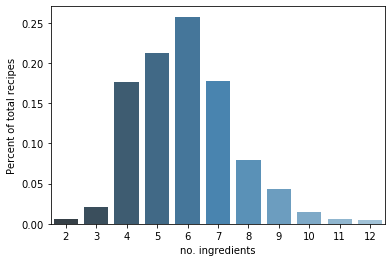

In [18]:
# Boxplot
# sns.boxplot(pivot['no. ingredients'])
# plt.show()

# Bar plot
ax = sns.barplot(x=pivot['no. ingredients'], y=pivot['no. ingredients'],
                 estimator=lambda x: len(x) / len(pivot['no. ingredients']), palette="Blues_d")
ax.set(ylabel="Percent of total recipes")
plt.show()

- --> 50% of the data is between 5 and 7 ingredients
- --> interesting to see which kind of cocktails exist on the tails here?
- --> Slight right skew makes sense, as mixing too many ingredients would likely be challenging to create a cohesive cocktail

Explore cocktails with very few ingredients

In [19]:
criteria_1 = pivot['no. ingredients'] <= 3
criteria_2 = pivot.loc[criteria_1,'recipe_name'].to_list()
criteria_3 = df['recipe_name'].isin(criteria_2)

df[criteria_3].head(10)

,recipe_name,recipe_ingredient,recipe_method,ingredient_quantity,ingredient_name,ingredient_cat_1,ingredient_cat_2,ingredient_cat_3,bottle_match
90,Diamondback,2 Ounces Rittenhouse 100 Rye,"Stir all the ingredients over ice, then strain...",2 Ounces,Rittenhouse 100 Rye,Spirits/Liqueurs,Whiskey,Rye,Rittenhouse Bottled In Bond Straight Rye
91,Diamondback,1/2 Ounce Lairds Bonded Apple Brandy,"Stir all the ingredients over ice, then strain...",1/2 Ounce,Lairds Bonded Apple Brandy,Spirits/Liqueurs,Brandy,Calvados,Lairds Old Apple Brandy
92,Diamondback,1/2 Ounce Yellow Chartreuse,"Stir all the ingredients over ice, then strain...",1/2 Ounce,Yellow Chartreuse,Spirits/Liqueurs,Liqueur,Herb,Chartreuse Yellow Liqueur (43%)
118,Gimlet,2 Ounces Perrys Tot Navy-Strength Gin,"Shake the gin and lime cordial with ice, then ...",2 Ounces,Perrys Tot Navy-Strength Gin,Spirits/Liqueurs,Gin,Any,Perrys Tot Navy Strength Gin
119,Gimlet,1 1/2 Ounces Tobys Lime Cordial,"Shake the gin and lime cordial with ice, then ...",1 1/2 Ounces,Tobys Lime Cordial,Syrups/Cordials,NaN,No match,No match
120,Gimlet,Garnish: 1 Lime Wedge,"Shake the gin and lime cordial with ice, then ...",Garnish: 1,Lime Wedge,Garnish,NaN,No match,No match
202,Mint Julep,2 Ounces Bakers Bourbon,Put the bourbon and simple syrup in a julep ti...,2 Ounces,Bakers Bourbon,Spirits/Liqueurs,Whiskey,Bourbon,Makers 46 Bourbon
203,Mint Julep,1/4 Ounce Simple Syrup,Put the bourbon and simple syrup in a julep ti...,1/4 Ounce,Simple Syrup,Syrups/Cordials,Simple Syrup,No match,No match
204,Mint Julep,Garnish: 1 Mint Bouquet,Put the bourbon and simple syrup in a julep ti...,Garnish: 1,Mint Bouquet,Garnish,NaN,No match,No match
372,Ti Punch,1/2 Ounce Lime Juice,"In a double rocks glass, muddle the lime and c...",1/2 Ounce,Lime Juice,Juice,Lime Juice,No match,No match


- --> Seems like a strong/highly distinct flavored spirit + some kind of topper

Explore cocktails with many ingredients

In [20]:
criteria_1 = pivot['no. ingredients'] >= 10
criteria_2 = pivot.loc[criteria_1,'recipe_name'].to_list()
criteria_3 = df['recipe_name'].isin(criteria_2)

df[criteria_3].head(10)

,recipe_name,recipe_ingredient,recipe_method,ingredient_quantity,ingredient_name,ingredient_cat_1,ingredient_cat_2,ingredient_cat_3,bottle_match
65,Cobras Fang,1 1/2 Ounces Appleton Estate Reserve Rum,Short shake all the ingredients with 3 ice cub...,1 1/2 Ounces,Appleton Estate Reserve Rum,Spirits/Liqueurs,Rum,Golden,Appleton Estate Reserve Blend
66,Cobras Fang,3/4 Ounce El Dorado 151 Rum,Short shake all the ingredients with 3 ice cub...,3/4 Ounce,El Dorado 151 Rum,Spirits/Liqueurs,Rum,Golden,El Dorado 5 Year Old Gold Rum
67,Cobras Fang,1 Teaspoon Massenez Creme De Peche Peach Liqueur,Short shake all the ingredients with 3 ice cub...,1 Teaspoon,Massenez Creme De Peche Peach Liqueur,Spirits/Liqueurs,Liqueur,Fruit,Merlet Creme de Peche (Peach) Liqueur
68,Cobras Fang,2 Dashes Vieux Pontarlier Absinthe,Short shake all the ingredients with 3 ice cub...,2 Dashes,Vieux Pontarlier Absinthe,Spirits/Liqueurs,Absinthe,Any,Tempus Fugit Vieux Pontarlier Absinthe
69,Cobras Fang,3/4 Ounce Lime Juice,Short shake all the ingredients with 3 ice cub...,3/4 Ounce,Lime Juice,Juice,Lime Juice,No match,No match
70,Cobras Fang,1/2 Ounce Orange Juice,Short shake all the ingredients with 3 ice cub...,1/2 Ounce,Orange Juice,Juice,Orange Juice,No match,No match
71,Cobras Fang,1/2 Ounce Passion Fruit Syrup,Short shake all the ingredients with 3 ice cub...,1/2 Ounce,Passion Fruit Syrup,Syrups/Cordials,Passion Fruit Syrup,No match,No match
72,Cobras Fang,1/2 Ounce Cinnamon Bark Syrup,Short shake all the ingredients with 3 ice cub...,1/2 Ounce,Cinnamon Bark Syrup,Syrups/Cordials,Cinnamon Syrup,No match,No match
73,Cobras Fang,1 Teaspoon Ginger Syrup,Short shake all the ingredients with 3 ice cub...,1 Teaspoon,Ginger Syrup,Syrups/Cordials,Ginger Syrup,No match,No match
74,Cobras Fang,1 Dash Angostura Bitters,Short shake all the ingredients with 3 ice cub...,1 Dash,Angostura Bitters,Bitters,Angostura,No match,No match


- --> Seems like some kind of punch style drinks?

How many ingredients of each category (spirits/bitters/etc.) are used in recipes? What’s the distribution for each category?

Aggregate data while still in long form

In [21]:
pivot = df.groupby(['recipe_name', 'ingredient_cat_1']).size().reset_index()
pivot.columns = ['recipe_name', 'ingredient_cat_1', 'COUNT ingredients_category']
pivot.head(10)

,recipe_name,ingredient_cat_1,COUNT ingredients_category
0,18Th Century,Juice,1
1,18Th Century,Spirits/Liqueurs,3
2,19Th Century,Juice,1
3,19Th Century,Spirits/Liqueurs,3
4,202 Steps,Bitters,1
5,202 Steps,Fresh,1
6,202 Steps,Garnish,1
7,202 Steps,Spirits/Liqueurs,1
8,202 Steps,Syrups/Cordials,1
9,20Th Century,Juice,1


Project to wide form to complete the ingredient matrix

In [22]:
pivot_2 = pivot.set_index(['recipe_name', 'ingredient_cat_1'])['COUNT ingredients_category'].unstack().reset_index()
pivot_2.rename_axis(None, axis=1, inplace=True)
pivot_2.fillna(0, inplace=True)
pivot_2.head(10)

,recipe_name,Bitters,Common,Fresh,Garnish,Juice,No match,Spirits/Liqueurs,Syrups/Cordials
0,18Th Century,0.00,0.00,0.00,0.00,1.00,0.00,3.00,0.00
1,19Th Century,0.00,0.00,0.00,0.00,1.00,0.00,3.00,0.00
2,202 Steps,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00
3,20Th Century,0.00,0.00,0.00,0.00,1.00,0.00,3.00,0.00
4,6Th Street Swizzle,1.00,1.00,0.00,0.00,0.00,0.00,3.00,1.00
5,Airmail,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00
6,Aka Cobbler,0.00,1.00,2.00,1.00,0.00,0.00,4.00,1.00
7,Alembic,2.00,0.00,0.00,0.00,2.00,0.00,2.00,1.00
8,Almond Brother,0.00,0.00,0.00,0.00,1.00,0.00,3.00,2.00
9,Alta California,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00


Explore distribution of different ingredient categories. This will tell us what the most common cocktail recipe is.

In [23]:
pivot_2.loc[:,'Bitters':'Syrups/Cordials'].describe()
pivot_2.loc[:,'Bitters':'Syrups/Cordials'].mode(axis=0)

,Bitters,Common,Fresh,Garnish,Juice,No match,Spirits/Liqueurs,Syrups/Cordials
count,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00
mean,0.52,0.29,0.23,0.60,0.75,0.11,2.66,0.77
std,0.65,0.60,0.46,0.49,0.77,0.32,1.15,0.68
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00
50%,0.00,0.00,0.00,1.00,1.00,0.00,3.00,1.00
75%,1.00,0.00,0.00,1.00,1.00,0.00,3.00,1.00
max,3.00,3.00,3.00,1.00,3.00,2.00,7.00,3.00


,Bitters,Common,Fresh,Garnish,Juice,No match,Spirits/Liqueurs,Syrups/Cordials
0,0.00,0.00,0.00,1.00,0.00,0.00,3.00,1.00


Plot distribution

Melt data into appropriate format for plotting (long)

In [24]:
pivot_3 = pivot_2.set_index('recipe_name').stack().reset_index()
pivot_3.columns = ['recipe_name', 'ingredient_cat_1', 'COUNT inrgedient_cat_1']
pivot_3 = pivot_3.groupby(['ingredient_cat_1', 'COUNT inrgedient_cat_1']).size().reset_index()
pivot_3.columns = ['ingredient_cat_1', '# of ingredients', '% of recipes']

pivot_3['% of recipes'] = pivot_3['% of recipes']/len(df['recipe_name'].drop_duplicates())
pivot_3

,ingredient_cat_1,# of ingredients,% of recipes
0,Bitters,0.00,0.56
1,Bitters,1.00,0.36
2,Bitters,2.00,0.07
3,Bitters,3.00,0.00
4,Common,0.00,0.79
5,Common,1.00,0.15
6,Common,2.00,0.06
7,Common,3.00,0.01
8,Fresh,0.00,0.79
9,Fresh,1.00,0.20


Plot

[Text(0, 0, 'Bitters'),
 Text(0, 0, 'Common'),
 Text(0, 0, 'Fresh'),
 Text(0, 0, 'Garnish'),
 Text(0, 0, 'Juice'),
 Text(0, 0, 'No match'),
 Text(0, 0, 'Spirits/Liqueurs'),
 Text(0, 0, 'Syrups/Cordials')]

Text(0.5, 1.0, '')

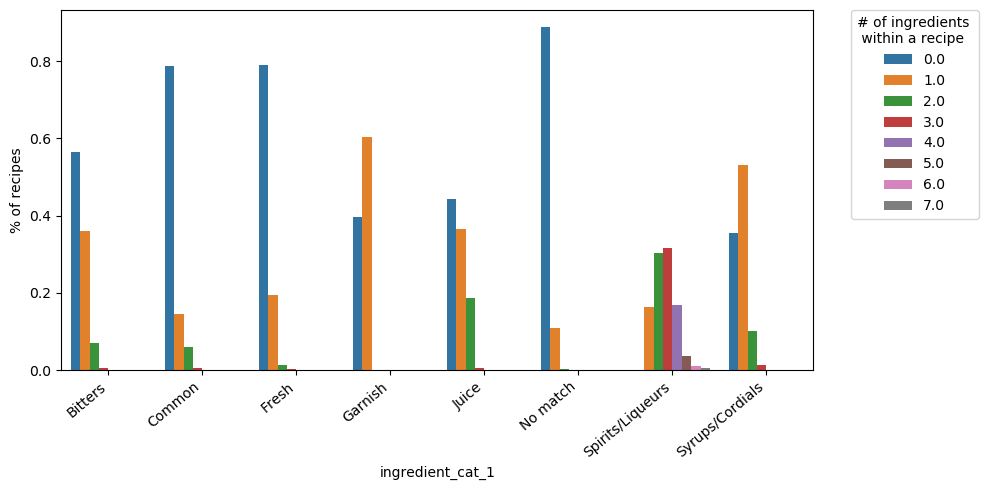

In [25]:
fig = plt.figure(figsize=(10,5), dpi = 100)
ax = sns.barplot(data = pivot_3, x='ingredient_cat_1', y='% of recipes', hue='# of ingredients')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='# of ingredients \n within a recipe')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('')
plt.tight_layout()
plt.show()

How does the presence of certain ingredient category types influence the presence of other ingredient category types?

Plot interaction between categorical data

In [26]:
cols = pivot_2.loc[:,'Bitters':'Syrups/Cordials'].columns
len(cols)
cols[0]

8

'Bitters'

State the Hypotheses
- Ho: Variable A and Variable B are independent.
- Ha: Variable A and Variable B are not independent.

Choose significance level:
- 0.05

Compute test statistic and p values

Juice,0.00,1.00,2.00,3.00
Bitters,,,,
0.00,85.00,119.00,58.00,1.00
1.00,97.00,47.00,23.00,1.00
2.00,23.00,4.00,6.00,0.00
3.00,2.00,0.00,0.00,0.00


Chi-square Statistic : 40.977640, p-value: 0.000005


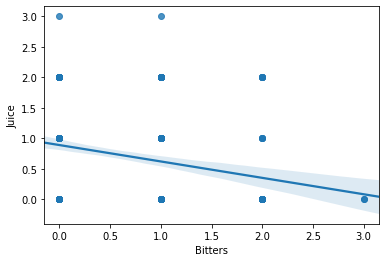

In [27]:
# Create dataframe
temp = pivot_2.groupby(['Bitters', 'Juice']).size().reset_index()
temp = temp.pivot_table(columns='Juice', index='Bitters', values=0, aggfunc='sum')
temp.fillna(0, inplace=True)
temp

# Compute
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(temp)
print (f'Chi-square Statistic : {chi2:f}, p-value: {p:f}')

# Plot
sns.regplot(x='Bitters', y='Juice', data=pivot_2[['Bitters', 'Juice']])

If our P-value is less than the significance level (0.05), we cannot accept the null hypothesis. Thus, we conclude that there is a relationship between the two variables.

Juice Spirits/Liqueurs
Chi-square Statistic : 101.485968, p-value: 0.000000


[Text(0, 0, '0.0'), Text(0, 0, '1.0'), Text(0, 0, '2.0'), Text(0, 0, '3.0')]

Text(0.5, 1.0, '')

<Figure size 1000x500 with 0 Axes>

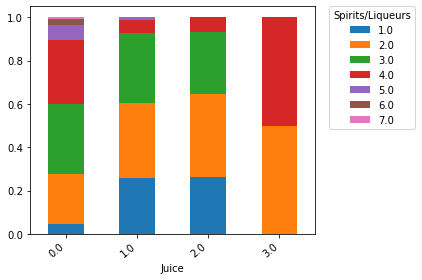

Juice Syrups/Cordials
Chi-square Statistic : 123.530270, p-value: 0.000000


[Text(0, 0, '0.0'), Text(0, 0, '1.0'), Text(0, 0, '2.0'), Text(0, 0, '3.0')]

Text(0.5, 1.0, '')

<Figure size 1000x500 with 0 Axes>

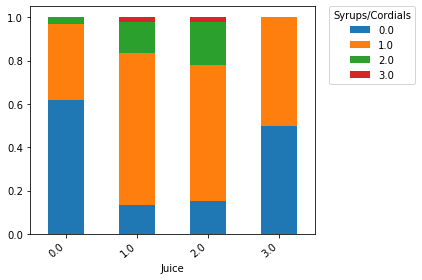

Spirits/Liqueurs Juice
Chi-square Statistic : 101.485968, p-value: 0.000000


[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0')]

Text(0.5, 1.0, '')

<Figure size 1000x500 with 0 Axes>

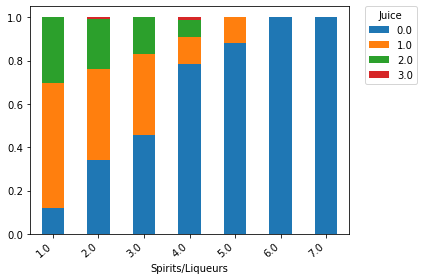

Spirits/Liqueurs Syrups/Cordials
Chi-square Statistic : 121.067422, p-value: 0.000000


[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0')]

Text(0.5, 1.0, '')

<Figure size 1000x500 with 0 Axes>

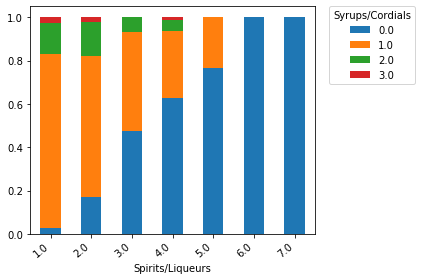

Syrups/Cordials Juice
Chi-square Statistic : 123.530270, p-value: 0.000000


[Text(0, 0, '0.0'), Text(0, 0, '1.0'), Text(0, 0, '2.0'), Text(0, 0, '3.0')]

Text(0.5, 1.0, '')

<Figure size 1000x500 with 0 Axes>

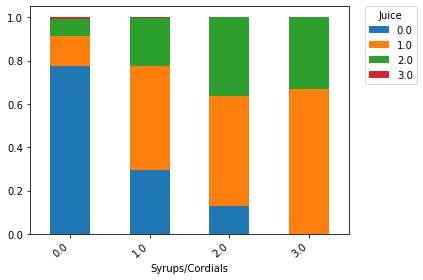

Syrups/Cordials Spirits/Liqueurs
Chi-square Statistic : 121.067422, p-value: 0.000000


[Text(0, 0, '0.0'), Text(0, 0, '1.0'), Text(0, 0, '2.0'), Text(0, 0, '3.0')]

Text(0.5, 1.0, '')

<Figure size 1000x500 with 0 Axes>

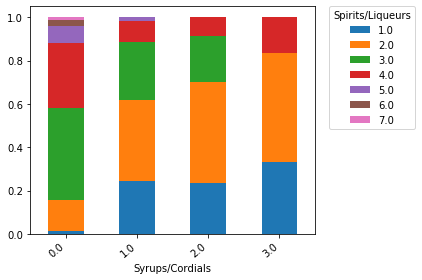

In [28]:
cols = pivot_2.loc[:, 'Bitters':'Syrups/Cordials'].columns

# Loop through all combinations of categories
for i in range(len(cols)):
    for j in range(len(cols)):
        if i != j:
            # Pivot data
            temp = pivot_2.groupby([cols[i], cols[j]]).size().reset_index()
            temp = temp.pivot_table(columns=cols[j], index=cols[i], values=0, aggfunc='sum')
            temp.fillna(0, inplace=True)
            
            # Compute Chi2
            from scipy.stats import chi2_contingency
            chi2, p, dof, expected = chi2_contingency(temp)
            
            # Print chi2 output and bivariate graph if greater than threshold
            if p < 0.05 and chi2 > 60:
                
                # Print
                print(cols[i], cols[j])
                print(f'Chi-square Statistic : {chi2:f}, p-value: {p:f}')
                temp = temp.div(temp.sum(1), axis=0)

                # Plot
                fig = plt.figure(figsize=(10,5), dpi = 100)
                ax = temp.plot(kind='bar', stacked=True)
                plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=cols[j])
                ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
                ax.set_title('')
                plt.tight_layout()
                plt.show()

WIP...
- More juice, more common ingredients
- More juice, less bitters
- More spirits, less common ingredients
- More spirits, less chance of adding a garnish
- More spirits, less syrups
- More spirits, less juice 
- More spirits, more bitters
- More syrups, more juice
- More syrups, more fresh ingredients

Explore correlation matrix

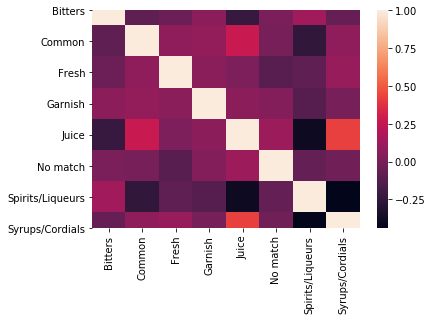

In [29]:
sns.heatmap(pivot_2.corr())

WIP... mine association rules

In [30]:
# Prepare dataframe
df_ar = pivot_2.drop(columns=['recipe_name', 'No match'])
df_ar.head(10)

# Convert dataframe to binary
for col in df_ar.columns:
    df_ar[col] = df_ar[col].apply(lambda x: min(x, 1))

# Preview
df_ar.head(10)

,Bitters,Common,Fresh,Garnish,Juice,Spirits/Liqueurs,Syrups/Cordials
0,0.00,0.00,0.00,0.00,1.00,3.00,0.00
1,0.00,0.00,0.00,0.00,1.00,3.00,0.00
2,1.00,0.00,1.00,1.00,0.00,1.00,1.00
3,0.00,0.00,0.00,0.00,1.00,3.00,0.00
4,1.00,1.00,0.00,0.00,0.00,3.00,1.00
5,0.00,0.00,0.00,0.00,1.00,2.00,1.00
6,0.00,1.00,2.00,1.00,0.00,4.00,1.00
7,2.00,0.00,0.00,0.00,2.00,2.00,1.00
8,0.00,0.00,0.00,0.00,1.00,3.00,2.00
9,0.00,0.00,0.00,0.00,0.00,3.00,1.00


,Bitters,Common,Fresh,Garnish,Juice,Spirits/Liqueurs,Syrups/Cordials
0,0.00,0.00,0.00,0.00,1.00,1.00,0.00
1,0.00,0.00,0.00,0.00,1.00,1.00,0.00
2,1.00,0.00,1.00,1.00,0.00,1.00,1.00
3,0.00,0.00,0.00,0.00,1.00,1.00,0.00
4,1.00,1.00,0.00,0.00,0.00,1.00,1.00
5,0.00,0.00,0.00,0.00,1.00,1.00,1.00
6,0.00,1.00,1.00,1.00,0.00,1.00,1.00
7,1.00,0.00,0.00,0.00,1.00,1.00,1.00
8,0.00,0.00,0.00,0.00,1.00,1.00,1.00
9,0.00,0.00,0.00,0.00,0.00,1.00,1.00


In [31]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find baskets
freq_items = apriori(df_ar, min_support=0.2, use_colnames=True, verbose=1)
freq_items.sort_values(by='support', ascending=False).head(10)

Processing 8 combinations | Sampling itemset size 4


,support,itemsets
5,1.00,(Spirits/Liqueurs)
6,0.65,(Syrups/Cordials)
17,0.65,"(Syrups/Cordials, Spirits/Liqueurs)"
3,0.60,(Garnish)
13,0.60,"(Garnish, Spirits/Liqueurs)"
4,0.56,(Juice)
15,0.56,"(Spirits/Liqueurs, Juice)"
23,0.48,"(Syrups/Cordials, Spirits/Liqueurs, Juice)"
16,0.48,"(Syrups/Cordials, Juice)"
0,0.44,(Bitters)


In [32]:
# Mine rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bitters),(Garnish),0.44,0.60,0.28,0.64,1.05,0.01,1.09
1,(Bitters),(Spirits/Liqueurs),0.44,1.00,0.44,1.00,1.00,0.00,inf
2,(Common),(Spirits/Liqueurs),0.21,1.00,0.21,1.00,1.00,0.00,inf
3,(Fresh),(Spirits/Liqueurs),0.21,1.00,0.21,1.00,1.00,0.00,inf
4,(Juice),(Garnish),0.56,0.60,0.35,0.63,1.05,0.02,1.08
5,(Garnish),(Spirits/Liqueurs),0.60,1.00,0.60,1.00,1.00,0.00,inf
6,(Spirits/Liqueurs),(Garnish),1.00,0.60,0.60,0.60,1.00,0.00,1.00
7,(Garnish),(Syrups/Cordials),0.60,0.65,0.39,0.65,1.01,0.00,1.02
8,(Syrups/Cordials),(Garnish),0.65,0.60,0.39,0.61,1.01,0.00,1.01
9,(Juice),(Spirits/Liqueurs),0.56,1.00,0.56,1.00,1.00,0.00,inf


# What can I make?

To determine which of these recipes a user can make, we must reformat the dataset and perform a filtering operation based on what a user has indicated they have in their home bar. For initial experimentation and likely for future use, the best place for such a tool to practically live is in a Google Sheet file. <br><br> 

Therefore, we will only prepare the dataframe here, and output it for the filtering operation. We will create the dataframe with the following specifications:
- Spirit/Liqueur category 2 & 3 will be merged for use
- Syrup, Bitters, Fresh, Juice, Common, will be used
- Garnish/No match will not be used

In [33]:
# Create empty column for final list of ingredients
df['ingredient_cat_merged'] = np.nan

# Merge spirits
criteria_1 = df['ingredient_cat_1'] == 'Spirits/Liqueurs'
df.loc[criteria_1, 'ingredient_cat_merged'] = df['ingredient_cat_2'] + '; ' + df['ingredient_cat_3']
#df.loc[criteria_1, 'ingredient_cat_merged']

# Merge Syrup, Bitters, Fresh, Juice, Common
criteria_1 = ['Bitters','Common', 'Fresh', 'Juice', 'Syrups/Cordials']
criteria_2 = df['ingredient_cat_1'].isin(criteria_1)
df.loc[criteria_2, 'ingredient_cat_merged'] = df['ingredient_cat_2'] 
df.loc[criteria_2].head(20)

,recipe_name,recipe_ingredient,recipe_method,ingredient_quantity,ingredient_name,ingredient_cat_1,ingredient_cat_2,ingredient_cat_3,bottle_match,ingredient_cat_merged
3,20Th Century,3/4 Ounce Lemon Juice,"Shake all the ingredients with ice, then doubl...",3/4 Ounce,Lemon Juice,Juice,Lemon Juice,No match,No match,Lemon Juice
5,Airmail,1/2 Ounce Lime Juice,Shake all the ingredients (except the champagn...,1/2 Ounce,Lime Juice,Juice,Lime Juice,No match,No match,Lime Juice
6,Airmail,1/2 Ounce Acacia Honey Syrup,Shake all the ingredients (except the champagn...,1/2 Ounce,Acacia Honey Syrup,Syrups/Cordials,Honey Syrup,No match,No match,Honey Syrup
11,Aviation,3/4 Ounce Lemon Juice,"Shake all the ingredients with ice, then strai...",3/4 Ounce,Lemon Juice,Juice,Lemon Juice,No match,No match,Lemon Juice
12,Aviation,1/4 Ounce Simple Syrup,"Shake all the ingredients with ice, then strai...",1/4 Ounce,Simple Syrup,Syrups/Cordials,Simple Syrup,No match,No match,Simple Syrup
16,Bamboo,1/2 Teaspoon Cane Sugar Syrup,"Stir all the ingredients over ice, then strain...",1/2 Teaspoon,Cane Sugar Syrup,Syrups/Cordials,NaN,No match,No match,NaN
17,Bamboo,1 Dash House Orange Bitters,"Stir all the ingredients over ice, then strain...",1 Dash,House Orange Bitters,Bitters,Orange,No match,No match,Orange
18,Bamboo,1 Dash Angostura Bitters,"Stir all the ingredients over ice, then strain...",1 Dash,Angostura Bitters,Bitters,Angostura,No match,No match,Angostura
21,Bees Knees,3/4 Ounce Lemon Juice,"Shake all the ingredients with ice, then strai...",3/4 Ounce,Lemon Juice,Juice,Lemon Juice,No match,No match,Lemon Juice
22,Bees Knees,3/4 Ounce Acacia Honey Syrup,"Shake all the ingredients with ice, then strai...",3/4 Ounce,Acacia Honey Syrup,Syrups/Cordials,Honey Syrup,No match,No match,Honey Syrup


Pivot to create long form dataframe

In [34]:
# Set filter criteria to only include the relevant categories
criteria_1 = ['Bitters','Common', 'Fresh', 'Juice', 'Syrups/Cordials', 'Spirits/Liqueurs']
criteria_2 = df['ingredient_cat_1'].isin(criteria_1)

# Create dataframe
pivot = df[criteria_2].groupby(['recipe_name', 'ingredient_cat_merged']).size().reset_index()
pivot.columns = ['recipe_name', 'ingredient_cat_merged', 'COUNT ingredient_cat_merged']
#pivot = pivot.merge(df[['ingredient_cat_merged', 'ingredient_cat_1']].drop_duplicates('ingredient_cat_merged'), how='left', on='ingredient_cat_merged')
pivot.head(20)

,recipe_name,ingredient_cat_merged,COUNT ingredient_cat_merged
0,18Th Century,Arrack; Any,1
1,18Th Century,Lime Juice,1
2,18Th Century,Liqueur; Fruit,1
3,18Th Century,Vermouth; Any,1
4,19Th Century,Lemon Juice,1
5,19Th Century,Liqueur; Fruit,1
6,19Th Century,Vermouth; Any,1
7,19Th Century,Whiskey; Bourbon,1
8,202 Steps,Orange,1
9,202 Steps,Simple Syrup,1


Convert data to complete, wide form for export

In [35]:
# Create data
pivot_2 = pivot.set_index(['recipe_name', 'ingredient_cat_merged'])['COUNT ingredient_cat_merged'].unstack().reset_index()
pivot_2.rename_axis(None, axis=1, inplace=True)
pivot_2.fillna(0, inplace=True)

# Convert values to binary
for col in pivot_2.columns:
    if col != 'recipe_name':
        pivot_2[col] = pivot_2[col].apply(lambda x: min(x, 1))
        
pivot_2.head(10)

,recipe_name,Absinthe; Any,Agave Syrup,Angostura,Apple,Apple Juice,Apple Syrup,Aquavit; Any,Aromatic,Arrack; Any,Balsamic Vinegar,Banana Syrup,Basil,Becherovka,Beer; Any,Beer; IPA,Beer; Lager,Beer; Stout,Black Currant Cordial,Blackberries,Blood Orange Juice,Blueberry Syrup,Brandied Cherries,Brandy; Any,Brandy; Armagnac,Brandy; Calvados,Brandy; Cognac,Brandy; Eau De Vie,Brandy; Pisco,Butter,Cachaca; Any,Cantaloupe Juice,Cardamom,Celery,Celery Juice,Cherry And Vanilla,Cherry Tomato,Cider; Any,Cilantro,Cinnamon,Cinnamon Syrup,Club Soda,Coconut Water,Cucumber,Cumin Syrup,Curried Ginger Syrup,Curry Leaves,Demerara Syrup,Egg,Espresso-Infused Demerara Syrup,Fortified Wine; Madeira,Fortified Wine; Port,Fortified Wine; Sherry,Fuji Apple Juice,Gin; Any,Gin; London,Gin; Old Tom,Gin; Sloe,Ginger Syrup,Granny Smith Apple Juice,Grapefruit,Grapefruit Juice,Grapes,Grenadine,Heavy Cream,Hibiscus Syrup,Honey Syrup,Jenever; Any,Kumquat Cordial,Lemon,Lemon Juice,Lime,Lime Juice,Liqueur; Chocolate and Coffee,Liqueur; Cream,Liqueur; Fruit,Liqueur; Herb,Liqueur; Other,Liqueur; Whisky,Maple Syrup,Mezcal; Any,Mint,Molasses,Mole,Nectarine,Orange,Orange Flower Water,Orange Juice,Orgeat,Passion Fruit Syrup,Peach,Pear,Pineapple Juice,Puree,Raspberries,Rose Water,Rum; Any,Rum; Golden,Rum; Spiced,Rum; White,Sage,Salt,Sauce,Scarlet Glow Syrup,Simple Syrup,Spices,Strawberry,Sugar,Tangerine,Tequila; Anejo,Tequila; Blanco,Tequila; Reposado,Tiki,Vanilla Syrup,Vermouth; Any,Vodka; Any,Whiskey,Whiskey; Any,Whiskey; Bourbon,Whiskey; Irish,Whiskey; Japanese,Whiskey; Rye,Whiskey; Scotch,Whiskey; Wheat,Wine; Champagne,Wine; Chardonnay,Wine; Red,Wine; Sparkling,Yogurt
0,18Th Century,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,19Th Century,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,202 Steps,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,20Th Century,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00

WIP...
- Merge in recipe ingredients and method prior to export for ease of reference

In [36]:
# WIP
# pivot_2 = pivot_2.merge(df[['recipe_name', 'recipe_ingredient', 'recipe_method']].drop_duplicates('recipe_name'), how='left', on='recipe_name')
# pivot_2

Write to file

In [37]:
#pivot_2.to_csv('output/make_recipes.csv', index=False, encoding='utf-8-sig')

# Optimize home bar

For ease of experimentation, the prototype optimization will be done using Excel's non-linear optimization tools. After some testing has been conducted, the optimization will be migrated back to Python. This section is currently focused on data preparation for this procedure.<br><br>

The optimization will encompass the Spirits and Liqueurs category only, and we will try both levels of the product hierarchy:
- Category 2 level ("Tequila")
- Category 3 level ("Blanco Tequila")

## Prepare data at Category 2 level

Pivot to create long form version of the dataframe

In [38]:
criteria_1 = df['ingredient_cat_1'] == 'Spirits/Liqueurs'
pivot = df[criteria_1].groupby(['recipe_name', 'ingredient_cat_2']).size().reset_index()
pivot.columns = ['recipe_name', 'ingredient_cat_2', 'COUNT ingredients_category']
pivot.head(15)

,recipe_name,ingredient_cat_2,COUNT ingredients_category
0,18Th Century,Arrack,1
1,18Th Century,Liqueur,1
2,18Th Century,Vermouth,1
3,19Th Century,Liqueur,1
4,19Th Century,Vermouth,1
5,19Th Century,Whiskey,1
6,202 Steps,Whiskey,1
7,20Th Century,Gin,1
8,20Th Century,Liqueur,1
9,20Th Century,Vermouth,1


Pivot to complete version of wide form before export

In [39]:
# Pivot to wide
pivot_2 = pivot.set_index(['recipe_name', 'ingredient_cat_2'])['COUNT ingredients_category'].unstack().reset_index()
pivot_2.rename_axis(None, axis=1, inplace=True)
pivot_2.fillna(0, inplace=True)

# Convert columns to binary
for col in pivot_2.columns:
    if col != 'recipe_name':
        pivot_2[col] = pivot_2[col].apply(lambda x: min(x, 1))

# Preview
pivot_2.head(10)

,recipe_name,Absinthe,Aquavit,Arrack,Beer,Brandy,Cachaca,Cider,Fortified Wine,Gin,Jenever,Liqueur,Mezcal,Rum,Tequila,Vermouth,Vodka,Whiskey,Wine
0,18Th Century,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,19Th Century,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,202 Steps,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,20Th Century,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,6Th Street Swizzle,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
5,Airmail,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
6,Aka Cobbler,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
7,Alembic,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
8,Almond Brother,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
9,Alta California,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00


Write to file

In [40]:
#pivot_2.to_csv('output/optimize_cat2.csv', index=False, encoding='utf-8-sig')

## Prepare data at Category 2 level

Pivot to create long form version of the dataframe

In [41]:
# Create dataframe
criteria_1 = df['ingredient_cat_1'] == 'Spirits/Liqueurs'
pivot = df[criteria_1].copy()

# Merge cat 2 and cat 3 for ease of reference during optimization
pivot['ingredient_cat_merged'] = df['ingredient_cat_2'] + '; ' + df['ingredient_cat_3']

# Pivot
pivot = pivot.groupby(['recipe_name', 'ingredient_cat_merged']).size().reset_index()
pivot.columns = ['recipe_name', 'ingredient_cat_merged', 'count']
pivot.head(20)

,recipe_name,ingredient_cat_merged,count
0,18Th Century,Arrack; Any,1
1,18Th Century,Liqueur; Fruit,1
2,18Th Century,Vermouth; Any,1
3,19Th Century,Liqueur; Fruit,1
4,19Th Century,Vermouth; Any,1
5,19Th Century,Whiskey; Bourbon,1
6,202 Steps,Whiskey; Bourbon,1
7,20Th Century,Gin; London,1
8,20Th Century,Liqueur; Fruit,1
9,20Th Century,Vermouth; Any,1


Pivot to complete version of wide form before export

In [42]:
# Pivot to wide
pivot_2 = pivot.set_index(['recipe_name', 'ingredient_cat_merged'])['count'].unstack().reset_index()
pivot_2.rename_axis(None, axis=1, inplace=True)
pivot_2.fillna(0, inplace=True)

# Convert columns to binary
for col in pivot_2.columns:
    if col != 'recipe_name':
        pivot_2[col] = pivot_2[col].apply(lambda x: min(x, 1))
        
# Preview
pivot_2.head(20)

,recipe_name,Absinthe; Any,Aquavit; Any,Arrack; Any,Beer; Any,Beer; IPA,Beer; Lager,Beer; Stout,Brandy; Any,Brandy; Armagnac,Brandy; Calvados,Brandy; Cognac,Brandy; Eau De Vie,Brandy; Pisco,Cachaca; Any,Cider; Any,Fortified Wine; Madeira,Fortified Wine; Port,Fortified Wine; Sherry,Gin; Any,Gin; London,Gin; Old Tom,Gin; Sloe,Jenever; Any,Liqueur; Chocolate and Coffee,Liqueur; Cream,Liqueur; Fruit,Liqueur; Herb,Liqueur; Other,Liqueur; Whisky,Mezcal; Any,Rum; Any,Rum; Golden,Rum; Spiced,Rum; White,Tequila; Anejo,Tequila; Blanco,Tequila; Reposado,Vermouth; Any,Vodka; Any,Whiskey; Any,Whiskey; Bourbon,Whiskey; Irish,Whiskey; Japanese,Whiskey; Rye,Whiskey; Scotch,Whiskey; Wheat,Wine; Champagne,Wine; Chardonnay,Wine; Red,Wine; Sparkling
0,18Th Century,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,19Th Century,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,202 Steps,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,20Th Century,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,6Th Street Swizzle,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Airmail,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
6,Aka Cobbler,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Alembic,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Almond Brother,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Alta California,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Write to file

In [43]:
#pivot_2.to_csv('output/optimize-cat3.csv', index=False, encoding='utf-8-sig')

# Generate Recipes

We will use a nearest neighbor style collaborative filtering model to accomplish 2 key tasks:
1. Based on an ingredient input, find similar ingredients (...to then build a recipe)
    1. WIP... auto generate an entire recipe based on the learnings in the recipe composition descriptive analytics
1. Based on a recipe input, find similar recipes that a user might like

## Prepare data for analysis

In [44]:
# Create dataframe
criteria_1 = ['Garnish', 'No match']
criteria_2 = df['ingredient_cat_1'].isin(criteria_1)
pivot = df[~criteria_2].copy()

# Create empty column
pivot['ingredient_cat_merged'] = np.nan

# Merge categories to single variable
criteria_1 = pivot['ingredient_cat_1'] == 'Spirits/Liqueurs'
pivot.loc[criteria_1, 'ingredient_cat_merged'] = pivot.loc[criteria_1, 'ingredient_cat_2'] + '; ' + pivot.loc[criteria_1, 'ingredient_cat_3']
pivot.loc[~criteria_1, 'ingredient_cat_merged'] = pivot.loc[~criteria_1, 'ingredient_cat_1'] + '; ' + pivot.loc[~criteria_1, 'ingredient_cat_2']

# Preview
pivot.head(10)

,recipe_name,recipe_ingredient,recipe_method,ingredient_quantity,ingredient_name,ingredient_cat_1,ingredient_cat_2,ingredient_cat_3,bottle_match,ingredient_cat_merged
0,20Th Century,1 1/2 Ounces Beefeater London Dry Gin,"Shake all the ingredients with ice, then doubl...",1 1/2 Ounces,Beefeater London Dry Gin,Spirits/Liqueurs,Gin,London,Beefeater London Dry Gin,Gin; London
1,20Th Century,3/4 Ounce Marie Brizard White Creme De Cacao,"Shake all the ingredients with ice, then doubl...",3/4 Ounce,Marie Brizard White Creme De Cacao,Spirits/Liqueurs,Liqueur,Fruit,Marie Brizard Creme de Cassis Liqueur,Liqueur; Fruit
2,20Th Century,3/4 Ounce Cocchi Americano,"Shake all the ingredients with ice, then doubl...",3/4 Ounce,Cocchi Americano,Spirits/Liqueurs,Vermouth,Any,Cocchi Americano Rosa,Vermouth; Any
3,20Th Century,3/4 Ounce Lemon Juice,"Shake all the ingredients with ice, then doubl...",3/4 Ounce,Lemon Juice,Juice,Lemon Juice,No match,No match,Juice; Lemon Juice
4,Airmail,1 Ounce Ron Del Barrilito 3-Star Rum,Shake all the ingredients (except the champagn...,1 Ounce,Ron Del Barrilito 3-Star Rum,Spirits/Liqueurs,Rum,Any,No match,Rum; Any
5,Airmail,1/2 Ounce Lime Juice,Shake all the ingredients (except the champagn...,1/2 Ounce,Lime Juice,Juice,Lime Juice,No match,No match,Juice; Lime Juice
6,Airmail,1/2 Ounce Acacia Honey Syrup,Shake all the ingredients (except the champagn...,1/2 Ounce,Acacia Honey Syrup,Syrups/Cordials,Honey Syrup,No match,No match,Syrups/Cordials; Honey Syrup
7,Airmail,Dry Champagne,Shake all the ingredients (except the champagn...,No match,Dry Champagne,Spirits/Liqueurs,Wine,Champagne,No match,Wine; Champagne
8,Aviation,2 Ounces Plymouth Gin,"Shake all the ingredients with ice, then strai...",2 Ounces,Plymouth Gin,Spirits/Liqueurs,Gin,London,Plymouth Gin,Gin; London
9,Aviation,1/2 Ounce Luxardo Maraschino Liqueur,"Shake all the ingredients with ice, then strai...",1/2 Ounce,Luxardo Maraschino Liqueur,Spirits/Liqueurs,Liqueur,Fruit,Luxardo Maraschino Liqueur,Liqueur; Fruit


Pivot to long form version of dataframe

In [45]:
pivot = pivot.groupby(['recipe_name', 'ingredient_cat_merged']).size().reset_index()
pivot.columns = ['recipe_name', 'ingredient_cat_merged', 'count']
pivot.head(10)

,recipe_name,ingredient_cat_merged,count
0,18Th Century,Arrack; Any,1
1,18Th Century,Juice; Lime Juice,1
2,18Th Century,Liqueur; Fruit,1
3,18Th Century,Vermouth; Any,1
4,19Th Century,Juice; Lemon Juice,1
5,19Th Century,Liqueur; Fruit,1
6,19Th Century,Vermouth; Any,1
7,19Th Century,Whiskey; Bourbon,1
8,202 Steps,Bitters; Orange,1
9,202 Steps,Fresh; Tangerine,1


Pivot to complete version of wide form before export

In [46]:
# Pivot to wide
pivot_2 = pivot.set_index(['recipe_name', 'ingredient_cat_merged'])['count'].unstack().reset_index()
pivot_2.rename_axis(None, axis=1, inplace=True)
pivot_2.fillna(0, inplace=True)

# Convert columns to binary
for col in pivot_2.columns:
    if col != 'recipe_name':
        pivot_2[col] = pivot_2[col].apply(lambda x: min(x, 1))

# Preview
pivot_2.head(10)

,recipe_name,Absinthe; Any,Aquavit; Any,Arrack; Any,Beer; Any,Beer; IPA,Beer; Lager,Beer; Stout,Bitters; Angostura,Bitters; Apple,Bitters; Aromatic,Bitters; Becherovka,Bitters; Celery,Bitters; Cherry And Vanilla,Bitters; Grapefruit,Bitters; Mole,Bitters; Orange,Bitters; Tiki,Bitters; Whiskey,Brandy; Any,Brandy; Armagnac,Brandy; Calvados,Brandy; Cognac,Brandy; Eau De Vie,Brandy; Pisco,Cachaca; Any,Cider; Any,Common; Balsamic Vinegar,Common; Butter,Common; Club Soda,Common; Egg,Common; Heavy Cream,Common; Molasses,Common; Puree,Common; Salt,Common; Sauce,Common; Spices,Common; Sugar,Common; Yogurt,Fortified Wine; Madeira,Fortified Wine; Port,Fortified Wine; Sherry,Fresh; Apple,Fresh; Basil,Fresh; Blackberries,Fresh; Brandied Cherries,Fresh; Cardamom,Fresh; Cherry Tomato,Fresh; Cilantro,Fresh; Cinnamon,Fresh; Cucumber,Fresh; Curry Leaves,Fresh; Grapefruit,Fresh; Grapes,Fresh; Lemon,Fresh; Lime,Fresh; Mint,Fresh; Nectarine,Fresh; Orange,Fresh; Peach,Fresh; Pear,Fresh; Raspberries,Fresh; Sage,Fresh; Strawberry,Fresh; Tangerine,Gin; Any,Gin; London,Gin; Old Tom,Gin; Sloe,Jenever; Any,Juice; Apple Juice,Juice; Blood Orange Juice,Juice; Cantaloupe Juice,Juice; Celery Juice,Juice; Fuji Apple Juice,Juice; Granny Smith Apple Juice,Juice; Grapefruit Juice,Juice; Lemon Juice,Juice; Lime Juice,Juice; Orange Juice,Juice; Pineapple Juice,Liqueur; Chocolate and Coffee,Liqueur; Cream,Liqueur; Fruit,Liqueur; Herb,Liqueur; Other,Liqueur; Whisky,Mezcal; Any,Rum; Any,Rum; Golden,Rum; Spiced,Rum; White,Syrups/Cordials; Agave Syrup,Syrups/Cordials; Apple Syrup,Syrups/Cordials; Banana Syrup,Syrups/Cordials; Black Currant Cordial,Syrups/Cordials; Blueberry Syrup,Syrups/Cordials; Cinnamon Syrup,Syrups/Cordials; Coconut Water,Syrups/Cordials; Cumin Syrup,Syrups/Cordials; Curried Ginger Syrup,Syrups/Cordials; Demerara Syrup,Syrups/Cordials; Espresso-Infused Demerara Syrup,Syrups/Cordials; Ginger Syrup,Syrups/Cordials; Grenadine,Syrups/Cordials; Hibiscus Syrup,Syrups/Cordials; Honey Syrup,Syrups/Cordials; Kumquat Cordial,Syrups/Cordials; Maple Syrup,Syrups/Cordials; Orange Flower Water,Syrups/Cordials; Orgeat,Syrups/Cordials; Passion Fruit Syrup,Syrups/Cordials; Rose Water,Syrups/Cordials; Scarlet Glow Syrup,Syrups/Cordials; Simple Syrup,Syrups/Cordials; Vanilla Syrup,Tequila; Anejo,Tequila; Blanco,Tequila; Reposado,Vermouth; Any,Vodka; Any,Whiskey; Any,Whiskey; Bourbon,Whiskey; Irish,Whiskey; Japanese,Whiskey; Rye,Whiskey; Scotch,Whiskey; Wheat,Wine; Champagne,Wine; Chardonnay,Wine; Red,Wine; Sparkling
0,18Th Century,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,19Th Century,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,202 Steps,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [47]:
pivot_2.shape

(466, 132)

Convert to numpy array prior to calculating cosine similarity

In [48]:
recipes_np = np.array(pivot_2.set_index('recipe_name'))
recipes_np

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
def similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

## Ingredient recommendations

Calculate cosine similarity for all ingredients

In [50]:
item_similarity = similarity(recipes_np, kind='item')
item_similarity.shape

(131, 131)

Assign back ingredient names for ease of reference

In [51]:
item_similarity = pd.DataFrame(item_similarity)
item_similarity.columns = pivot_2.set_index('recipe_name').columns
item_similarity.columns.to_list()

['Absinthe; Any',
 'Aquavit; Any',
 'Arrack; Any',
 'Beer; Any',
 'Beer; IPA',
 'Beer; Lager',
 'Beer; Stout',
 'Bitters; Angostura',
 'Bitters; Apple',
 'Bitters; Aromatic',
 'Bitters; Becherovka',
 'Bitters; Celery',
 'Bitters; Cherry And Vanilla',
 'Bitters; Grapefruit',
 'Bitters; Mole',
 'Bitters; Orange',
 'Bitters; Tiki',
 'Bitters; Whiskey',
 'Brandy; Any',
 'Brandy; Armagnac',
 'Brandy; Calvados',
 'Brandy; Cognac',
 'Brandy; Eau De Vie',
 'Brandy; Pisco',
 'Cachaca; Any',
 'Cider; Any',
 'Common; Balsamic Vinegar',
 'Common; Butter',
 'Common; Club Soda',
 'Common; Egg',
 'Common; Heavy Cream',
 'Common; Molasses',
 'Common; Puree',
 'Common; Salt',
 'Common; Sauce',
 'Common; Spices',
 'Common; Sugar',
 'Common; Yogurt',
 'Fortified Wine; Madeira',
 'Fortified Wine; Port',
 'Fortified Wine; Sherry',
 'Fresh; Apple',
 'Fresh; Basil',
 'Fresh; Blackberries',
 'Fresh; Brandied Cherries',
 'Fresh; Cardamom',
 'Fresh; Cherry Tomato',
 'Fresh; Cilantro',
 'Fresh; Cinnamon',
 'Fres

Find similar ingredients!

In [52]:
# User input based on above list
input = 'Tequila; Blanco'

# Find column # of user input
search = item_similarity.columns.to_list().index(input)

# Find position of top 10 similar ingredients in that column
return_item_similarity = item_similarity.iloc[:,search].nlargest(11).index.values

# Return names for top ingredients, except for the same ingredient itself
[item_similarity.columns[x] for x in return_item_similarity if item_similarity.columns[x] != input]

['Common; Salt',
 'Juice; Lime Juice',
 'Beer; Any',
 'Syrups/Cordials; Agave Syrup',
 'Fresh; Cucumber',
 'Mezcal; Any',
 'Bitters; Celery',
 'Syrups/Cordials; Simple Syrup',
 'Common; Sauce',
 'Fresh; Cilantro']

--> Seems to be working well! More robust estimation of error to be calculated below.

## Recipe recommendations

Calculate cosine similarity for all ingredients

In [53]:
recipe_similarity = similarity(recipes_np, kind='user')
recipe_similarity.shape

(466, 466)

Assign back ingredient names for ease of reference

In [54]:
recipe_similarity = pd.DataFrame(recipe_similarity)
recipe_similarity.columns = pivot_2['recipe_name'].values
recipe_similarity.columns.to_list()[:20]

['18Th Century',
 '19Th Century',
 '202 Steps',
 '20Th Century',
 '6Th Street Swizzle',
 'Airmail',
 'Aka Cobbler',
 'Alembic',
 'Almond Brother',
 'Alta California',
 'Amityville',
 'Angies Secret',
 'Angus Story Daiquiri',
 'Anjou Mama',
 'Aperitivo Julep',
 'Arrack Punch',
 'Arrack Strap',
 'Arrackuiri',
 'Augie March',
 'Autumn Daiquiri']

Find similar recipes!

In [55]:
# User input based on above list
input = 'Corpse Reviver #2'

# Find column # of user input
search = recipe_similarity.columns.to_list().index(input)

# Find position of top 10 similar ingredients in that column
return_recipe_similarity = recipe_similarity.iloc[:,search].nlargest(11).index.values

# Return names for top ingredients, except for the same ingredient itself
[recipe_similarity.columns[x] for x in return_recipe_similarity if recipe_similarity.columns[x] != input]

['20Th Century',
 'The Joy Division',
 'Dick Brautigan',
 'Lucien Gaudin',
 'Lucinos Delight',
 '19Th Century',
 'Aviation',
 'Coffey Park Swizzle',
 'Gonzalez',
 'Imperial March']

Very similar profiles recommended!

Corpse reviver:
- BEEFEATER LONDON DRY GIN
- COINTREAU
- LILLET BLANC
- VIEUX PONTARLIER ABSINTHE
- LEMON JUICE

20Th Century
- BEEFEATER LONDON DRY GIN
- MARIE BRIZARD WHITE CRÈME DE CACAO
- COCCHI AMERICANO
- LEMON JUICE

The Joy Division
- BEEFEATER LONDON DRY GIN
- DOLIN DRY VERMOUTH
- COINTREAU
- VIEUX PONTARLIER ABSINTHE
- GARNISH: 1 LEMON TWIST

## Evaluate quality of predictions...WIP

In [56]:
# Define function to evaluate predictions on test set
# def predict_simple(ratings, similarity, kind='user'):
#     if kind == 'user':
#         return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
#     elif kind == 'item':
#         return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [57]:
# Evaluate
#predict_simple(test, item_similarity, kind='item')